In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats
import pandas as pd
import xarray as xr
import graphviz

In [3]:
# 2M1

def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior 
    prior = np.repeat(1, grid_points)  # uniform (the 1 is arbitrary, any positive constant would do)
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior (pointwise multiplication, vectorization of *)
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1 (vectorization of division by a scalar)
    posterior = unstd_posterior / unstd_posterior.sum()
    return xr.DataArray(posterior, dims="p", coords={"p": p_grid})


In [19]:
def plot_posterior(grid_points, W, N):
    points = (5, grid_points)
    _, ax = plt.subplots(1, 2, figsize=(10, 4))
    kwargs = { 'marker': 'o', 'color': 'black', 'markersize': 5, 'label': f'{W} x water in {N} trials' }

    for i in range(2):
        posterior_grid_approx(points[i], W, N).plot(ax = ax[i], **kwargs)
        ax[i].set_title(f"{points[i]} grid points", fontsize="medium")
        ax[i].legend(fontsize='small')
        ax[i].tick_params(axis='both', labelsize='small')

    plt.suptitle("Grid Approximation for the Water/Land Posterior")
    plt.show()


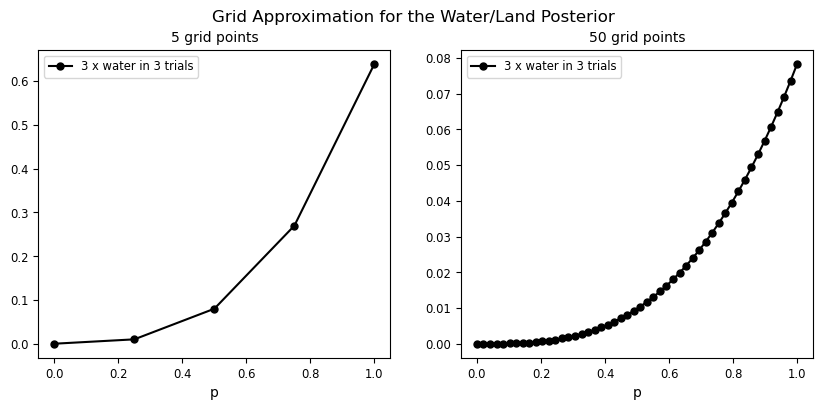

In [20]:
plot_posterior(50, 3, 3)

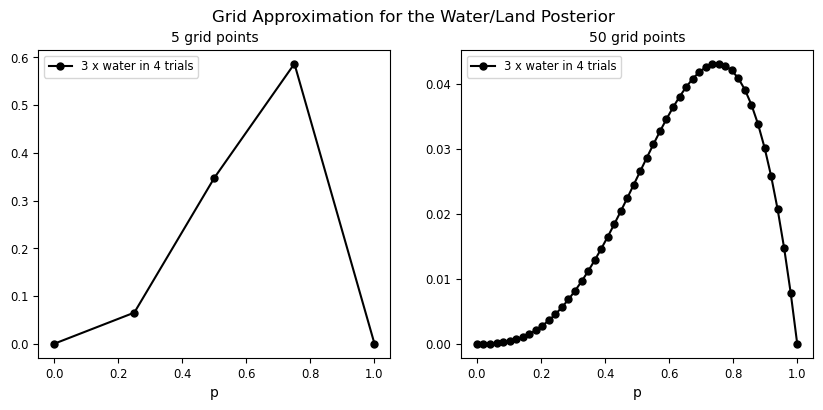

In [21]:
plot_posterior(50, 3, 4)

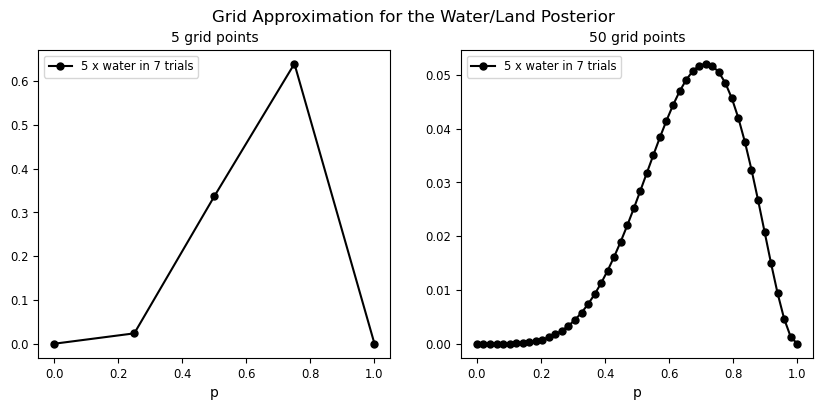

In [22]:
plot_posterior(50, 5, 7)

In [24]:
# 2M2

def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior 
    prior = np.repeat(1, grid_points)  # uniform (the 1 is arbitrary, any positive constant would do)
    prior = (p_grid >= 0.5).astype(int)  # truncated <--- changed this line to truncate values below 0.5
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior (pointwise multiplication, vectorization of *)
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1 (vectorization of division by a scalar)
    posterior = unstd_posterior / unstd_posterior.sum()
    return xr.DataArray(posterior, dims="p", coords={"p": p_grid})

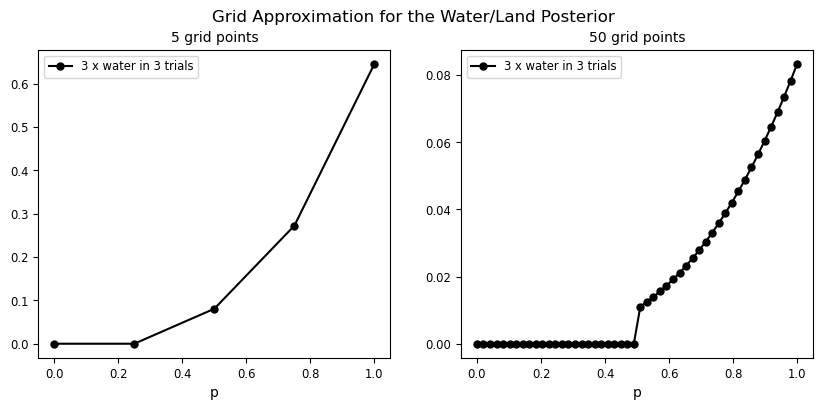

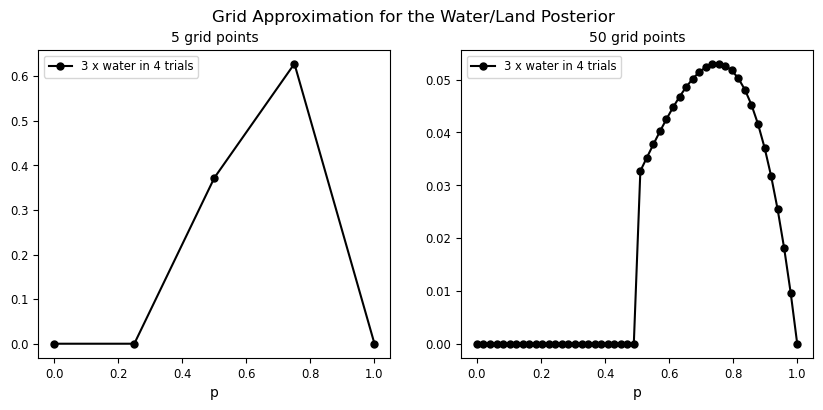

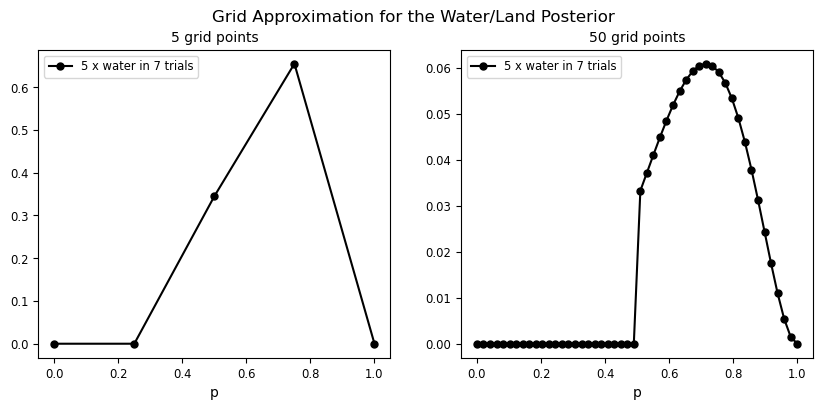

In [25]:
plot_posterior(50, 3, 3)
plot_posterior(50, 3, 4)
plot_posterior(50, 5, 7)

In [ ]:
# 2M3

# Bayes Theorem

$$
\Pr(p\mid D) = {\Pr(D\mid p)\cdot\Pr(p)\over \Pr(D)}
$$


$$
\Pr(p\mid D) = \Pr(Earth\mid Land) = {\Pr(Land\mid Earth)\cdot\Pr(Earth)\over \Pr(Land)}\\
\Pr(Earth\mid Land) = {0.3\cdot0.5\over 0.65} = 0.2308 = 23.08\%
$$

In [29]:
pr_land_earth = 0.3
pr_land = 1.3
pr_earth = 1
( pr_land_earth * pr_earth ) / pr_land

0.23076923076923075

In [30]:
# 2M4
"""
Suppose you have a deck with only three cards. Each card has two sides, and each side is either
black or white. One card has two black sides. The second card has one black and one white side. The
third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone
reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,
but you don't know the color of the side facing down. Show that the probability that the other side is
also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This
means counting up the ways that each card could produce the observed data (a black side facing up
on the table).
"""

pr_black = 0.5
pr_black_black = 1
pr_black_white = 0.5

pr_black_black * pr_black / ( pr_black_black * pr_black + pr_black_white * pr_black + pr_black_white * pr_black )

0.5